# Logistric Regression

In this demo, we will train and test a logistic regression model on a toy classification dataset.

### 1. Load dataset and split it into train/test sets

We can use the [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function from sklearn to generate the data.

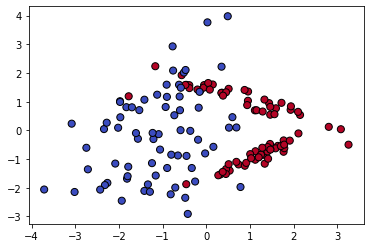

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, Y = make_classification(n_samples=150,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2)


plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

print(X_train.shape)
print(X_test.shape)

(90, 2)
(60, 2)


### 2. Define and train a logistic regression model on the train set

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0)
model.fit(X_train, Y_train)

LogisticRegression()

### 3. Evaluate the trained logistic regression model on the test set

In [ ]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test set:', acc)

Accuracy on test set: 0.8


### 4. Visualize the decision boundary

First, we create a meshgrid.

In [ ]:
import numpy as np

X0 = X[:, 0]
X1 = X[:, 1]

# Find the range of the 2 dimensions that we will plot
X0_min, X0_max = X0.min()-1, X0.max()+1
X1_min, X1_max = X1.min()-1, X1.max()+1

n_steps = 100 # Number of steps on each axis

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(X0_min, X0_max, (X0_max-X0_min)/n_steps),
                     np.arange(X1_min, X1_max, (X1_max-X1_min)/n_steps))

Next, we predict the model for each point on the meshgrid. Here we use the [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) function to get the probability values. For each example, this function will return the probability for all labels. So the result will be an $n \times c$ matrix where $n$ is the number of examples and $c$ is the number of labels.

In [ ]:
np.shape(np.c_[xx.ravel(), yy.ravel()])

(10000, 2)

In [ ]:
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z[:, 1] # Here we use the second column of the predictions, which corresponds to the label 1.
Z1 = Z1.reshape(xx.shape)

In [ ]:
Z[5,:]

array([9.99933766e-01, 6.62338842e-05])

Finally, we plot the data and contour of the probability.

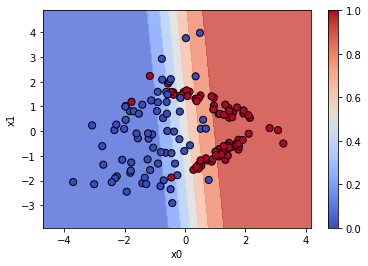

In [ ]:
plt.contourf(xx, yy, Z1, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
plt.xlabel('x0')
plt.ylabel('x1')
plt.colorbar()
plt.show()